<a href="https://colab.research.google.com/github/ihabiba/NLP-Labs/blob/main/Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1.1 – Import Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Step 2.0 – Download 20 Newsgroups Dataset


In [4]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("crawford/20-newsgroups")

print("Dataset downloaded to:", path)


Using Colab cache for faster access to the '20-newsgroups' dataset.
Dataset downloaded to: /kaggle/input/20-newsgroups


## Step 2.1 – Inspect Dataset Files


In [5]:
import os

print("Files in dataset directory:")
print(os.listdir(path))


Files in dataset directory:
['misc.forsale.txt', 'rec.autos.txt', 'list.csv', 'comp.os.ms-windows.misc.txt', 'sci.electronics.txt', 'comp.sys.mac.hardware.txt', 'talk.politics.mideast.txt', 'talk.politics.guns.txt', 'talk.religion.misc.txt', 'comp.graphics.txt', 'soc.religion.christian.txt', 'rec.sport.hockey.txt', 'rec.sport.baseball.txt', 'comp.windows.x.txt', 'comp.sys.ibm.pc.hardware.txt', 'rec.motorcycles.txt', 'sci.med.txt', 'sci.space.txt', 'alt.atheism.txt', 'sci.crypt.txt', 'talk.politics.misc.txt']


## Step 2.2 – Load Text Documents from 20 Newsgroups


In [6]:
import os
import pandas as pd

base_path = "/root/.cache/kagglehub/datasets/crawford/20-newsgroups/versions/1"

categories = [
    "rec.autos",
    "comp.graphics",
    "sci.med",
    "talk.politics.guns"
]

texts = []
true_labels = []

for cat in categories:
    file_path = os.path.join(base_path, cat + ".txt")

    with open(file_path, "r", encoding="latin-1") as f:
        documents = [doc.strip() for doc in f.read().split("\n\n") if doc.strip()]
        texts.extend(documents)
        true_labels.extend([cat] * len(documents))

df = pd.DataFrame({
    "text": texts,
    "category": true_labels
})

print(df.head())
print(df["category"].value_counts())


                                                text   category
0  Newsgroup: rec.autos\ndocument_id: 101551\nFro...  rec.autos
1  In article <C4vIr5.L3r@shuksan.ds.boeing.com>,...  rec.autos
2  Say, you bought your Saturn at $13k, with a de...  rec.autos
3  Moreover, if Saturn really does reduce the dea...  rec.autos
4  1) Attract even more people to buy Saturns bec...  rec.autos
category
comp.graphics         21667
talk.politics.guns    15068
sci.med               13762
rec.autos             11650
Name: count, dtype: int64


## Step 2.3 – Convert Text to TF-IDF Representation


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

X_tfidf = vectorizer.fit_transform(df["text"])


# Step 2.4 – Apply K-Means Clustering


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=4,
    random_state=42
)

cluster_labels = kmeans.fit_predict(X_tfidf)

df["cluster"] = cluster_labels


## Step 2.5 – Reduce Dimensionality Using PCA


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())


## Step 2.6 – Visualize K-Means Clusters


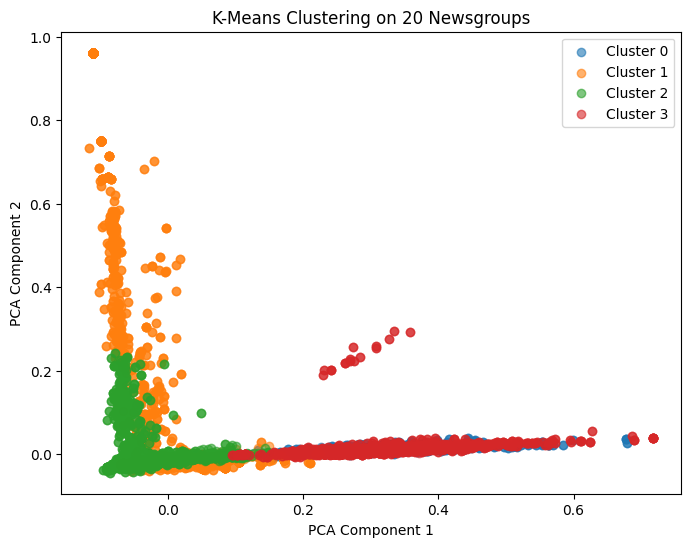

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for cluster in range(4):
    plt.scatter(
        X_pca[df["cluster"] == cluster, 0],
        X_pca[df["cluster"] == cluster, 1],
        label=f"Cluster {cluster}",
        alpha=0.6
    )

plt.title("K-Means Clustering on 20 Newsgroups")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


## Step 2.7 – Compute Distance Matrix


In [ ]:
from sklearn.metrics.pairwise import cosine_distances

distance_matrix = cosine_distances(X_tfidf)


# Step 2.8 – Apply Agglomerative Clustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(
    n_clusters=4,
    metric="precomputed",
    linkage="average"
)

agg_labels = agg_clustering.fit_predict(distance_matrix)

df["agg_cluster"] = agg_labels


## Step 2.9 – Visualize Agglomerative Clusters Using PCA


In [ ]:
plt.figure(figsize=(8, 6))

for cluster in range(4):
    plt.scatter(
        X_pca[df["agg_cluster"] == cluster, 0],
        X_pca[df["agg_cluster"] == cluster, 1],
        label=f"Cluster {cluster}",
        alpha=0.6
    )

plt.title("Agglomerative Clustering on 20 Newsgroups")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


## Step 2.10 – Compare Clustering Results


In [ ]:
pd.crosstab(df["cluster"], df["agg_cluster"])
